In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import local functions
from general_functions import *

In [2]:
# Import data
reghub_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgsIpu8x82sG1hvtw?e=mDKP33")
df = pd.read_csv(reghub_data_link)

categories_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgtUGq11-RnT89oCQ?e=9QIaXH")
df_categories = pd.read_csv(categories_data_link)

In [3]:
df_categories

,Unnamed: 0,legal,sanctions,papers,reports,statements,guidelines,press,personnel,market
0,0,regulation,Fine,issues alert,released a report,letter,guideline,press release,Neuer Chef,Aktien Europa
1,1,regulations,accuse,whitepaper,report suggests,statement,rundschreiben,newsletter,Neuer Head of,behält die Bewertung
2,2,) order,fined,working paper,report,speech,circular,pressemitteilung,übernimmt Leitung,Kurserholung
3,3,Commission Implementing Decision,fines,white paper,bericht,opinion,faq,pressemeldung,zieht in Vorstand,Stock:
4,4,act,Milliardenbusse,wissenschaftlicher artikel,survey,kapitalmarktinformation,q&a,pressebericht,zieht in Aufsichtsrat,'halten'
5,5,comission decision,lawsuite,wissenschaftliche publikation,umfrage,stellungnahme,questions & answers,press announcement,mit neuem Bereichs,'kaufen'
6,6,amendment,Strafe,studie,poll,ansprache,questions and answers,press statement,leitet Generationenwechsel,Märkte am Morgen
7,7,directive,Warnung,study,NaN,kundmachung,leitfaden,media release,stockt Personal,DAX
8,8,rule,Sanction,wissenschaftlicher aufsatz,NaN,Bekanntmachung,anleitung,news release,ernennt C,Dow Jones
9,9,rts,Sanctions,essay,NaN,offizielle Mitteilung,hinweis,press communiqué,ins Führungsteam,chartanalyse


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                14578 non-null  object 
 1   _index             14552 non-null  object 
 2   _score             29 non-null     object 
 3   _type              14526 non-null  object 
 4   concepts           2260 non-null   object 
 5   found_dates        13808 non-null  object 
 6   id                 14532 non-null  object 
 7   internal_links     13759 non-null  object 
 8   keywords           2369 non-null   object 
 9   language           14516 non-null  object 
 10  news_author        1990 non-null   object 
 11  news_content       14501 non-null  object 
 12  news_date          14504 non-null  object 
 13  news_label         238 non-null    object 
 14  news_last_updated  11 non-null     object 
 15  news_legalinforce  14504 non-null  object 
 16  news_link          145

In [12]:
# Clean the df
df.dropna(subset=["news_content"], inplace=True)
# Create a list of the newly created columns for later use
rule_cols = []
# Create rule based category labels
for category in df_categories.columns[1:]:
    # Add columns for rule-based labels
    df[f"rule_labels_{category}"] = "Other"
    rule_cols.append(f"rule_labels_{category}")
    # Match words from the category lists
    for index, row in df.iterrows():
        if any(word.lower() in str(row["news_content"]).lower() for word in list(df_categories[category].dropna())):
            df.at[index, f"rule_labels_{category}"] = category

In [13]:
# Compress the four category columns into one
df['rule_labels_comb'] = df[rule_cols].values.tolist()
df['rule_labels_comb'] = df['rule_labels_comb'].apply(lambda lst: [val for val in lst if val != 'Other'])
df.drop(columns=rule_cols, inplace=True)

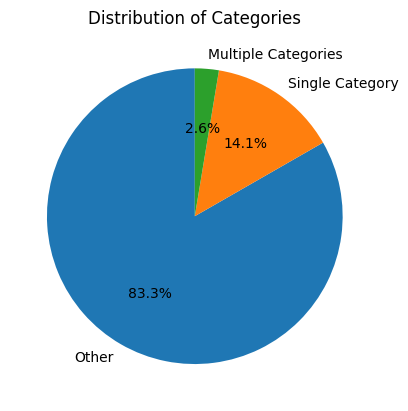

In [14]:
# Visulaization
count_empty = df['rule_labels_comb'].apply(len).eq(0).sum()
count_single = df['rule_labels_comb'].apply(len).eq(1).sum()
count_multiple = df['rule_labels_comb'].apply(len).gt(1).sum()

# Data for plotting
labels = ['Other', 'Single Category', 'Multiple Categories']
sizes = [count_empty, count_single, count_multiple]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()

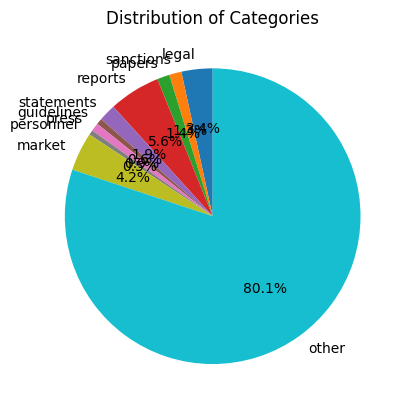

In [29]:
# Visualization
vis_cats = []
for category in df_categories.columns[1:]:
    vis_cats.append(df['rule_labels_comb'].apply(lambda lst: lst.count(category)).sum())
vis_cats.append(df['rule_labels_comb'].apply(len).eq(0).sum())

# Data for plotting
labels = list(df_categories.columns[1:]) + ["other"]
sizes = vis_cats
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()

In [30]:
df.to_csv("data_rule_labels_updated.csv")